In [6]:
import pandas as pd

# import four time series dataframes
df_rmg = pd.read_csv("RMG.csv")
df_nwg = pd.read_csv("NWG.csv")
df_jet = pd.read_csv("JET.csv")
df_aht = pd.read_csv("AHT.csv")

df_rmg.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,447.000000,455.200012,444.899994,455.200012,382.402466,4415776
1,2018-01-03,456.700012,461.100006,454.700012,459.200012,385.762817,10293028
2,2018-01-04,460.000000,460.899994,452.899994,454.200012,381.562439,4665871
3,2018-01-05,453.000000,458.899994,451.600006,455.799988,382.906525,4338316
4,2018-01-08,456.399994,460.799988,454.399994,458.500000,385.174744,7571632


In [8]:
df_nwg.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,277.200012,279.700012,276.100006,277.299988,238.221817,6870581
1,2018-01-03,277.000000,278.600006,275.500000,275.500000,236.675491,10660425
2,2018-01-04,276.299988,279.399994,275.600006,278.000000,238.823166,12082941
3,2018-01-05,278.000000,279.299988,276.100006,276.299988,237.362732,9925316
4,2018-01-08,276.500000,279.500000,275.799988,278.700012,239.424576,12129375


In [9]:
df_jet.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,5081.660156,5090.0,5020.0,5088.0,5088.0,4016
1,2018-01-03,4995.000000,5020.0,4995.0,5088.0,5088.0,107
2,2018-01-04,5009.000000,5009.0,5009.0,5030.0,5030.0,55
3,2018-01-05,5020.000000,5020.0,5020.0,5030.0,5030.0,66
4,2018-01-08,5030.000000,5030.0,5030.0,5030.0,5030.0,0


In [10]:
df_aht.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1989.0,1997.0,1915.0,1966.0,1867.997314,2140515
1,2018-01-03,2013.0,2028.0,1989.0,2004.0,1904.103149,2105870
2,2018-01-04,2025.0,2025.0,2009.0,2019.0,1918.355225,1369926
3,2018-01-05,2025.0,2025.0,2004.0,2015.0,1914.554688,1320990
4,2018-01-08,2020.0,2036.0,2013.0,2020.0,1919.305542,1747752


In [11]:
# import datetime to analyse the missing dates

import datetime
y = 2018
m = 1
d = 1
x = datetime.datetime(y, m, d)
time = x.strftime("%Y-%m-%d")

# i have already figured out that all the dates in 4 datasets
# match each other. therefore there is no point in doing each
# dataset separately.

# arrange the dates in a list format from the date column of any dataset
list_of_date = list(df_rmg['Date'])

In [12]:
time_list = []
i = 0

# main loop in finding the missing values including weekends
while i < len(list_of_date):
    if list_of_date[i] == time:
        i += 1
    elif list_of_date[i] != time: 
        time_list.append(time)
    if y == 2020 and m == 2 and d == 28:
        d += 1
    if m == 12 and d == 31:
        y += 1
        m = 1
        d = 1
    elif m == 2 and (d == 28 or d == 29):
        m += 1
        d = 1
    elif d == 31:
        m += 1
        d = 1
    elif d == 30:
        if m == 4 or m == 6 or m == 9 or m == 11:
            m +=1
            d = 1
        elif m == 1 or m == 3 or m == 5 or m == 7 or m == 8 or m == 10 or m == 12:
            d += 1
    elif d != 31:
        d += 1
    x = datetime.datetime(y, m, d)
    time = x.strftime("%Y-%m-%d")
    
print(len(time_list))

335


In [13]:
# THERE WERE 52 SATURDAYS AND 52 SUNDAYS IN 2018, 2019, AND 2020
# add the 01/01/2018
print((len(time_list)) + 1 - 52*6)

24


In [14]:
# THE MISSING DAYS EXCEPT SATURDAY AND SUNDAY ARE 24

In [15]:
# loop to remove weekends (saturday and sunday)
without_weekend = []
for i in range(0, len(time_list)):
    date = time_list[i]
    day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
    day = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
    if day_name[day] != 'Saturday' and day_name[day] != 'Sunday':
        without_weekend.append(time_list[i])

# these are the missing dates in the dataset excluding the weekends
print(len(without_weekend))

24


In [16]:
# take the date and the close column in the main dataframes
# by deleting the rest

rmg = pd.DataFrame(df_rmg)

del rmg['Volume']
del rmg['Adj Close']
del rmg['Open']
del rmg['High']
del rmg['Low']

nwg = pd.DataFrame(df_nwg)

del nwg['Volume']
del nwg['Adj Close']
del nwg['Open']
del nwg['High']
del nwg['Low']

jet = pd.DataFrame(df_jet)

del jet['Volume']
del jet['Adj Close']
del jet['Open']
del jet['High']
del jet['Low']

aht = pd.DataFrame(df_aht)

del aht['Volume']
del aht['Adj Close']
del aht['Open']
del aht['High']
del aht['Low']

In [17]:
j = 0

# run a loop to include the missing values in our datasets
# by integrating the dates we figured out and keeping the 
# corresponding values of 'close' column as NaN for now

for i in range(len(rmg), 759 + len(without_weekend)):
    rmg.loc[i] = without_weekend[j], 'NaN'
    nwg.loc[i] = without_weekend[j], 'NaN'
    jet.loc[i] = without_weekend[j], 'NaN'
    aht.loc[i] = without_weekend[j], 'NaN'
    j += 1

In [18]:
# sort the dataframe by the date column
rmg.sort_values(by=['Date'], inplace=True)
nwg.sort_values(by=['Date'], inplace=True)
jet.sort_values(by=['Date'], inplace=True)
aht.sort_values(by=['Date'], inplace=True)

# reset the index
rmg = rmg.reset_index(drop = True)
nwg = nwg.reset_index(drop = True)
jet = jet.reset_index(drop = True)
aht = aht.reset_index(drop = True)

# assign the first data in Close column of date 2018/1/1 as the
# value of 2018/1/2 since there are no previous values than 2018/1/1
rmg['Close'][0] = rmg['Close'][1]
nwg['Close'][0] = nwg['Close'][1]
jet['Close'][0] = jet['Close'][1]
aht['Close'][0] = aht['Close'][1]

print(aht.iloc[:,1])

0      1966
1      1966
2      2004
3      2019
4      2015
       ... 
778    3433
779     NaN
780     NaN
781    3460
782    3489
Name: Close, Length: 783, dtype: object


In [19]:
# fill the missing values in Close column as the closest previous value
# in time
t = 0
for t in range(0, 783):
    if rmg['Close'][t] == 'NaN':
        rmg['Close'][t] = rmg['Close'][t-1]
    if nwg['Close'][t] == 'NaN':
        nwg['Close'][t] = nwg['Close'][t-1]
    if jet['Close'][t] == 'NaN':
        jet['Close'][t] = jet['Close'][t-1]
    if aht['Close'][t] == 'NaN':
        aht['Close'][t] = aht['Close'][t-1]
    t += 1

In [22]:
# check for missing values
rmg.isnull().sum()

Date     0
Close    0
dtype: int64

In [23]:
# check for missing values
nwg.isnull().sum()

Date     0
Close    0
dtype: int64

In [24]:
# check for missing values
jet.isnull().sum()

Date     0
Close    0
dtype: int64

In [25]:
# check for missing values
aht.isnull().sum()

Date     0
Close    0
dtype: int64

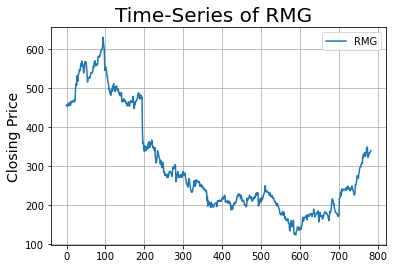

In [31]:
# plot the time series for the dataset
import matplotlib.pyplot as plt
rmg['Close'].plot(grid = True, label = 'RMG')
plt.figtext(.5, .9, "Time-Series of RMG", fontsize = 20, ha = 'center')
plt.ylabel('Closing Price', fontsize = 14)
plt.legend()
plt.show()

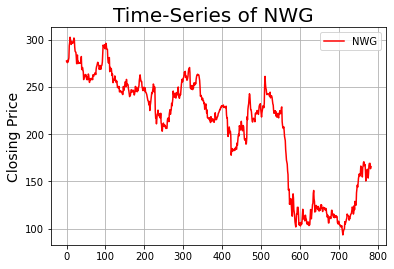

In [32]:
nwg['Close'].plot(grid = True, label = 'NWG', color = 'red')
plt.figtext(.5, .9, "Time-Series of NWG", fontsize = 20, ha = 'center')
plt.ylabel('Closing Price', fontsize = 14)
plt.legend()
plt.show()

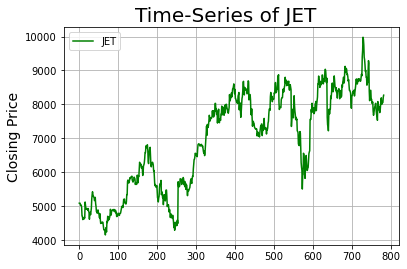

In [33]:
jet['Close'].plot(grid = True, label = 'JET', color = 'green')
plt.figtext(.5, .9, "Time-Series of JET", fontsize = 20, ha = 'center')
plt.ylabel('Closing Price', fontsize = 14)
plt.legend()
plt.show()

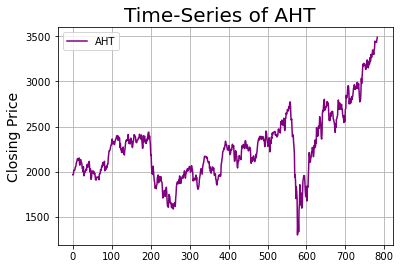

In [34]:
aht['Close'].plot(grid = True, label = 'AHT', color = 'purple')
plt.figtext(.5, .9, "Time-Series of AHT", fontsize = 20, ha = 'center')
plt.ylabel('Closing Price', fontsize = 14)
plt.legend()
plt.show()

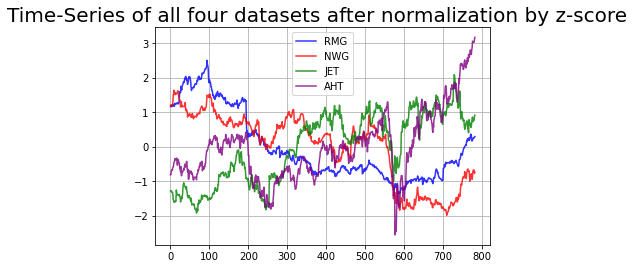

In [37]:
# Normalization to z-score
rmg['Close'] = (rmg['Close'] - rmg['Close'].mean())/rmg['Close'].std()
nwg['Close'] = (nwg['Close'] - nwg['Close'].mean())/nwg['Close'].std()
jet['Close'] = (jet['Close'] - jet['Close'].mean())/jet['Close'].std()
aht['Close'] = (aht['Close'] - aht['Close'].mean())/aht['Close'].std()

# plot the time series after standardization
import matplotlib.pyplot as plt

plt.figtext(.5, .9, "Time-Series of all four datasets after normalization by z-score", fontsize = 20, ha = 'center')
rmg['Close'].plot(grid = True, label = 'RMG', alpha = 0.8, color = 'blue')
nwg['Close'].plot(grid = True, label = 'NWG', alpha = 0.8, color = 'red')
jet['Close'].plot(grid = True, label = 'JET', alpha = 0.8, color = 'green')
aht['Close'].plot(grid = True, label = 'AHT', alpha = 0.8, color = 'purple')
plt.legend()
plt.show()